# CoronaVirus Analysis and Forecasting using Data Science

Data Source: Johns Hopkins CSSE Data Repository - aggregated from multiple sources.  
https://github.com/CSSEGISandData/COVID-19

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

## Get the Datasets

Live data is stored in files named MM-DD-YYYY.csv, so get the current date for live data updates.  
Check the repo to see if current day's data is available yet.  If not, manually override the day.  
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

In [2]:
# Create the filename to load based on today's date

day = str(pd.datetime.now().day) if pd.datetime.now().day >= 10 else "0" + str(pd.datetime.now().day)
month = str(pd.datetime.now().month) if pd.datetime.now().month >= 10 else "0" + str(pd.datetime.now().month)
year = str(pd.datetime.now().year)

date = month + "-" + day + "-" + year
date

'03-25-2020'

In [3]:
#  First try to pull today's data, but if it's not available yet, pull yesterday's data

try:
    fileURL = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/" + date + ".csv"
    livedata = pd.read_csv(fileURL)
except:
    day = str(pd.datetime.now().day - 1)
    date = month + "-" + day + "-" + year
    fileURL = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/" + date + ".csv"
    livedata = pd.read_csv(fileURL)
    
date

'03-25-2020'

In [4]:
# Check out the first 5 rows to make sure the data loaded correctly

livedata.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-03-25 23:33:19,34.223334,-82.461707,3,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-03-25 23:33:19,30.295065,-92.414197,2,0,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-03-25 23:33:19,37.767072,-75.632346,2,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-03-25 23:33:19,43.452658,-116.241552,24,0,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-03-25 23:33:19,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


**Also pull the historic time series data.  Note that it won't have live data from today.**

In [5]:
# Note 3/23 - the "Confirmed" file is now deprecated.  Use confirmed_global instead

# confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,21,22,22,22,24,24,40,40,74,84
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,51,55,59,64,70,76,89,104,123,146
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,54,60,74,87,90,139,201,230,264,302
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,2,39,39,53,75,88,113,133,164,188
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,1,2,2,3,3,3


In [6]:
# Note 3/23 - the "Deaths" file is now deprecated.  Use deaths_global instead

# deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv")
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

## Start examining the data - Exploratory Data Analysis (EDA)

In [7]:
# Total Global confirmed cases
livedata['Confirmed'].sum()

467594

In [8]:
# Total Global deaths
livedata['Deaths'].sum()

21181

In [9]:
# Total US confirmed cases
livedata[livedata["Country_Region"]=='US']['Confirmed'].sum()

65778

In [10]:
# Total US Deaths
livedata[livedata["Country_Region"]=='US']['Deaths'].sum()

942

In [11]:
# Make a Pivot Table to summarize the confirmed cases by Country
date_columns = confirmed.iloc[:, 4:].columns
confirmed_country = pd.pivot_table(confirmed, index=['Country/Region'], values=date_columns, aggfunc=np.sum)
confirmed_country = confirmed_country.transpose()
confirmed_country.index = pd.to_datetime(confirmed_country.index)
confirmed_country = confirmed_country.sort_index()

In [12]:
# Top 20 by confirmed count as of latest date
top_20_C = confirmed_country.loc[date].sort_values(ascending=False).nlargest(20)
top_20_C

Country/Region
China             81661
Italy             74386
US                65778
Spain             49515
Germany           37323
Iran              27017
France            25600
Switzerland       10897
United Kingdom     9640
Korea, South       9137
Netherlands        6438
Austria            5588
Belgium            4937
Canada             3251
Norway             3084
Portugal           2995
Brazil             2554
Sweden             2526
Turkey             2433
Israel             2369
Name: 2020-03-25 00:00:00, dtype: int64

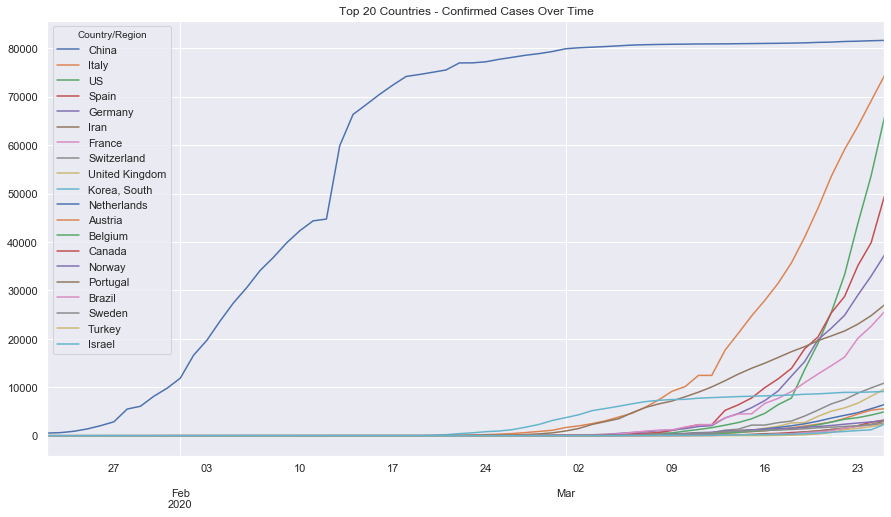

In [24]:
# Plot the top 20 countries confirmed infections over time
confirmed_country[top_20_C.index].plot(figsize=(15,8), title="Top 20 Countries - Confirmed Cases Over Time")

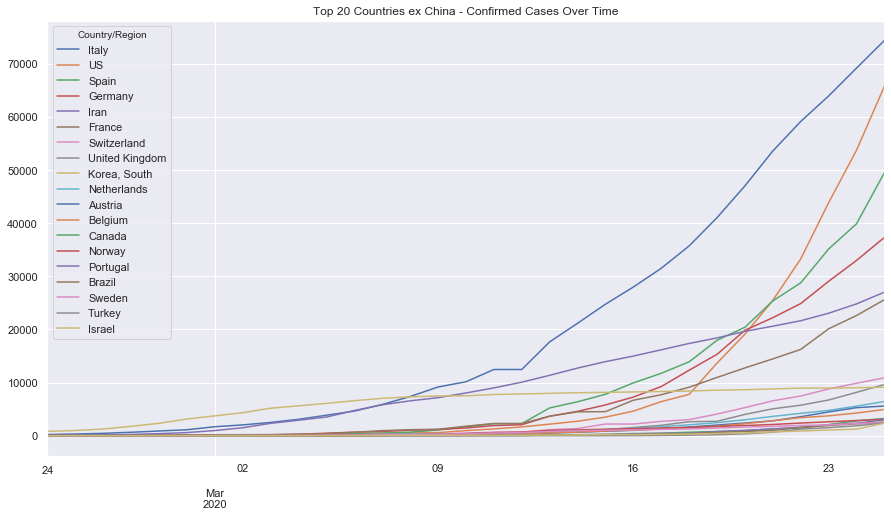

In [25]:
# Same chart but excluding China and starting on 2/24 to zoom in
confirmed_country[top_20_C.index].loc['02/24/2020':, top_20_C.index != 'China'].plot(figsize=(15,8), title="Top 20 Countries ex China - Confirmed Cases Over Time")

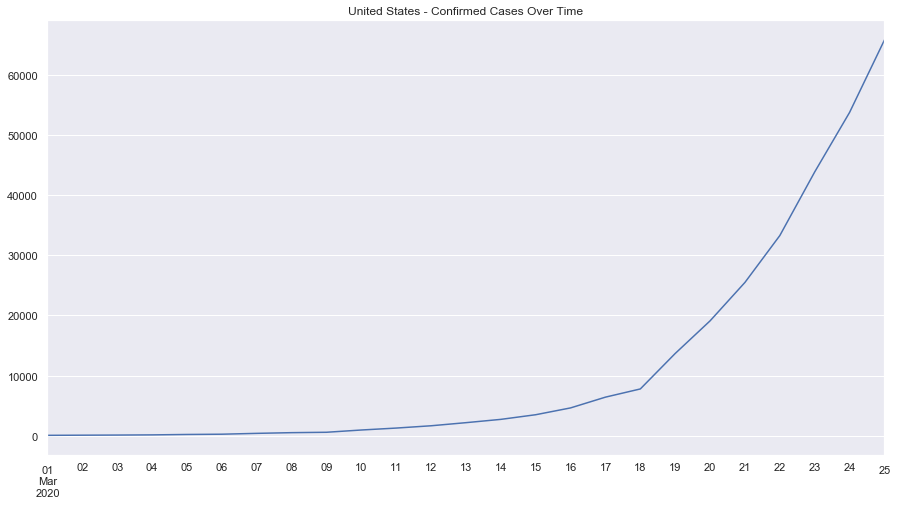

In [26]:
# Same chart but US only and starting on 3/1 to zoom in
confirmed_country[top_20_C.index].loc['3/1/2020':, 'US'].plot(figsize=(15,8), title="United States - Confirmed Cases Over Time")

## UPDATE 3/24 - John Hopkins is no longer providing US state historical data.  Will need to get this from another source  
See Covid Tracking Project.  
https://covidtracking.com/data/

In [27]:
livedata[livedata["Province_State"]=='California']

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
25,6001.0,Alameda,California,US,2020-03-25 23:33:19,37.646294,-121.892927,135,2,0,0,"Alameda, California, US"
53,6003.0,Alpine,California,US,2020-03-25 23:33:19,38.596786,-119.822359,0,0,0,0,"Alpine, California, US"
54,6005.0,Amador,California,US,2020-03-25 23:33:19,38.445831,-120.656960,2,0,0,0,"Amador, California, US"
330,6007.0,Butte,California,US,2020-03-25 23:33:19,39.667278,-121.600525,4,0,0,0,"Butte, California, US"
339,6009.0,Calaveras,California,US,2020-03-25 23:33:19,38.205371,-120.552913,2,0,0,0,"Calaveras, California, US"
615,6011.0,Colusa,California,US,2020-03-25 23:33:19,39.178820,-122.233173,0,0,0,0,"Colusa, California, US"
624,6013.0,Contra Costa,California,US,2020-03-25 23:33:19,37.919235,-121.928953,108,1,0,0,"Contra Costa, California, US"
756,6015.0,Del Norte,California,US,2020-03-25 23:33:19,41.742283,-123.897406,0,0,0,0,"Del Norte, California, US"
858,6017.0,El Dorado,California,US,2020-03-25 23:33:19,38.779660,-120.523317,3,0,0,0,"El Dorado, California, US"
991,6019.0,Fresno,California,US,2020-03-25 23:33:19,36.757339,-119.646695,18,0,0,0,"Fresno, California, US"


In [28]:
livedata[livedata["Province_State"]=='Massachusetts']

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
134,25001.0,Barnstable,Massachusetts,US,2020-03-25 23:33:19,41.729806,-70.288543,51,1,0,0,"Barnstable, Massachusetts, US"
194,25003.0,Berkshire,Massachusetts,US,2020-03-25 23:33:19,42.374284,-73.205248,71,0,0,0,"Berkshire, Massachusetts, US"
271,25005.0,Bristol,Massachusetts,US,2020-03-25 23:33:19,41.792284,-71.108722,67,0,0,0,"Bristol, Massachusetts, US"
824,25007.0,Dukes,Massachusetts,US,2020-03-25 23:33:19,41.406747,-70.687635,0,0,0,0,"Dukes, Massachusetts, US"
825,NaN,Dukes and Nantucket,Massachusetts,US,2020-03-25 23:33:19,41.406747,-70.687635,3,0,0,0,"Dukes and Nantucket,Massachusetts,US"
888,25009.0,Essex,Massachusetts,US,2020-03-25 23:33:19,42.668763,-70.946872,177,0,0,0,"Essex, Massachusetts, US"
968,25011.0,Franklin,Massachusetts,US,2020-03-25 23:33:19,42.581197,-72.586025,14,0,0,0,"Franklin, Massachusetts, US"
1171,25013.0,Hampden,Massachusetts,US,2020-03-25 23:33:19,42.134404,-72.632356,45,0,0,0,"Hampden, Massachusetts, US"
1172,25015.0,Hampshire,Massachusetts,US,2020-03-25 23:33:19,42.339980,-72.658985,11,0,0,0,"Hampshire, Massachusetts, US"
1916,25017.0,Middlesex,Massachusetts,US,2020-03-25 23:33:19,42.486077,-71.390492,446,1,0,0,"Middlesex, Massachusetts, US"


**TODO NEXT:**  
- Look into this alternative Dataset that claims to improve on JHU formatting.  https://github.com/open-covid-19/data
- More EDA and Data Viz
- Aggregate time series data into Pivot Tables, consolidate confirmed, deaths, recovered, active into one multi-level index dataFrame
- Perform forecasting using the historic time series data
- Get population data for each country / state and add to this report (may be easiest to just put in a csv file)
  - Also population density if possible
- Add metrics based on poulation data (% of population infected, etc)
- Model out different scenarios: 
  - No changes
  - Lockdown
  - Extensive testing
  - Mandatory quarantines
  - Containment effectiveness score for each country (estimated)
  - Cure discovered
- Look into using Unity to model out scenarios, using simulated humans and the Global / US map tool I have